## Load State & County Returns
* MIT Election Data + Science Lab: https://electionlab.mit.edu/data
* State Level - US Presidents 1976 - 2016 Returns by Candidate (to identify swing states): https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX
* County Level - US Presidential Election Returns 2000 - 2016 (to identify swing counties): https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ


In [0]:
# imports
import pandas as pd
import seaborn as sns

In [0]:
# load in state and county returns saved on github
county_returns = "https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/county_candidate.csv"
state_returns = "https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/state_candidate.csv"

In [0]:
# read in state candidate returns as dataframe
state_df = pd.read_csv(state_returns)

# display datframe
display(state_df)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2016,Wyoming,WY,56,83,68,US President,NaN,NaN,True,6904,258788,20171015,NaN
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN
3737,2016,Wyoming,WY,56,83,68,US President,Blank Vote,NaN,False,2661,258788,20171015,NaN
3738,2016,Wyoming,WY,56,83,68,US President,"Castle, Darrell L.",constitution party,False,2042,258788,20171015,NaN


In [0]:
# summary statistics for state_df
state_df.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version,notes
count,3740.000000,3740.000000,3740.000000,3740.000000,3.740000e+03,3.740000e+03,3740.0,0.0
mean,1996.021390,28.855882,53.874866,40.006150,3.151389e+05,2.214284e+06,20171015.0,NaN
std,12.586011,15.637863,26.062865,22.756304,7.371322e+05,2.252806e+06,0.0,NaN
min,1976.000000,1.000000,11.000000,1.000000,1.000000e+00,1.235740e+05,20171015.0,NaN
25%,1984.000000,17.000000,33.000000,22.000000,1.498750e+03,6.296560e+05,20171015.0,NaN
50%,1996.000000,28.000000,54.000000,42.000000,8.992000e+03,1.533950e+06,20171015.0,NaN
75%,2008.000000,42.000000,81.000000,61.000000,2.245050e+05,2.808605e+06,20171015.0,NaN
max,2016.000000,56.000000,95.000000,82.000000,8.753788e+06,1.418160e+07,20171015.0,NaN


In [0]:
# read in state candidate returns as dataframe
county_df = pd.read_csv(county_returns)

# display datframe
display(county_df)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203
...,...,...,...,...,...,...,...,...,...,...,...
50519,2016,Alaska,AK,District 40,2040.0,President,Donald Trump,republican,1377.0,4610,20191203
50520,2016,Alaska,AK,District 40,2040.0,President,Other,NaN,895.0,4610,20191203
50521,2016,Alaska,NaN,District 99,2099.0,President,Hillary Clinton,democrat,274.0,5056,20191203
50522,2016,Alaska,NaN,District 99,2099.0,President,Donald Trump,republican,40.0,5056,20191203


In [0]:
# summary statistics for county_df
county_df.describe()

,year,FIPS,candidatevotes,totalvotes,version
count,50524.000000,50476.000000,5.012000e+04,5.052400e+04,50524.0
mean,2007.500594,30289.728980,1.246028e+04,3.918383e+04,20191203.0
std,5.809379,15233.456362,4.761937e+04,1.128238e+05,0.0
min,2000.000000,1001.000000,0.000000e+00,0.000000e+00,20191203.0
25%,2004.000000,18161.000000,2.930000e+02,4.800750e+03,20191203.0
50%,2008.000000,29167.000000,2.181000e+03,1.039800e+04,20191203.0
75%,2012.000000,45077.000000,7.424250e+03,2.663900e+04,20191203.0
max,2016.000000,56045.000000,2.464364e+06,3.434308e+06,20191203.0


In [0]:
county_df["candidate"].unique()

array(['Al Gore', 'George W. Bush', 'Ralph Nader', 'Other', 'John Kerry',
       'Barack Obama', 'John McCain', 'Mitt Romney', 'Hillary Clinton',
       'Donald Trump'], dtype=object)

In [0]:
state_df["candidate"].unique()[:5]

array(['Carter, Jimmy', 'Ford, Gerald', 'Maddox, Lester',
       'Bubar, Benjamin ""Ben""', 'Hall, Gus'], dtype=object)

## Merge State & County Return Datasets

EH Preliminary Observations:
* county and state level `totalvotes` do not match up because state level data is from 1976 - 2016 whereas county level data is from 2000 - 2016
* county data does not contain votes for write-in candidates, which state level data does
* we can merge the two datasets on state name, election year, and candidate name
* need to clean up county data's candidate name in order to merge data

In [0]:
# transform county dataset's candidate name to "last name, first name" to match
# state level dataset

county_candidates = {'Al Gore': 'Gore, Al', 'George W. Bush': 'Bush, George W.', 
                     'Ralph Nader': 'Nader, Ralph', 'Other': 'Other',
                     'John Kerry': 'Kerry, John', 'Barack Obama': 'Obama, Barack H.',
                     'John McCain': 'McCain, John', 'Mitt Romney': 'Romney, Mitt',
                     'Hillary Clinton': 'Clinton, Hilary','Donald Trump': 'Trump, Donald J.'} 

# create a list of new candidates names
candidate_xformed = [county_candidates.get(name) if name in county_candidates else name for name in county_df["candidate"]]

# add in new column of candidate names into county dataset
county_df["candidate_xformed"] = candidate_xformed

In [0]:
# take a look at the newly added column in county_df
county_df.head(3)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version,candidate_xformed
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203,"Gore, Al"
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203,"Bush, George W."
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203,"Nader, Ralph"


In [0]:
# merge county and state datasets
returns_df = pd.merge(county_df, state_df, how = "left", left_on = ["year","state","candidate_xformed"], right_on = ["year", "state", "candidate"])

In [0]:
# sanity check merged datasets
print("# of columns in county_df: {}, state_df: {}, returns_df:{}".format(len(county_df), len(state_df), len(returns_df)))

# of columns in county_df: 50524, state_df: 3740, returns_df:51729


In [0]:
# drop duplicate columns
dropReturnsCols = ['version_x', 'candidate_xformed', 'state_po_y', 'office_y', 'party_y', 'version_y', 'notes']
returns_df = returns_df.drop(columns = dropReturnsCols)

# rename columns for clarity
returns_df.columns = ['year', 'state', 'state_po', 'county', 'FIPS', 'office_county',
       'candidate_county', 'party_county', 'candidatevotes_county', 'totalvotes_county',
       'state_fips', 'state_cen', 'state_ic', 'candidate_state', 'writein',
       'candidatevotes_state', 'totalvotes_state']

In [0]:
# take a look at merged returns dataset
returns_df.head(10)

,year,state,state_po,county,FIPS,office_county,candidate_county,party_county,candidatevotes_county,totalvotes_county,state_fips,state_cen,state_ic,candidate_state,writein,candidatevotes_state,totalvotes_state
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,1.0,63.0,41.0,"Gore, Al",False,692611.0,1666272.0
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,1.0,63.0,41.0,"Bush, George W.",False,941173.0,1666272.0
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,1.0,63.0,41.0,"Gore, Al",False,692611.0,1666272.0
5,2000,Alabama,AL,Baldwin,1003.0,President,George W. Bush,republican,40872.0,56480,1.0,63.0,41.0,"Bush, George W.",False,941173.0,1666272.0
6,2000,Alabama,AL,Baldwin,1003.0,President,Ralph Nader,green,1033.0,56480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,Alabama,AL,Baldwin,1003.0,President,Other,NaN,578.0,56480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Alabama,AL,Barbour,1005.0,President,Al Gore,democrat,5188.0,10395,1.0,63.0,41.0,"Gore, Al",False,692611.0,1666272.0
9,2000,Alabama,AL,Barbour,1005.0,President,George W. Bush,republican,5096.0,10395,1.0,63.0,41.0,"Bush, George W.",False,941173.0,1666272.0


## Load in Economic Profile by County
* Personal Economic Profile by County: https://apps.bea.gov/regional/downloadzip.cfm


In [0]:
# load in economic profile by county data saved on github
cainc30 = "https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/CAINC30.csv"

In [0]:
# read in state candidate returns as dataframe
econ_df = pd.read_csv(cainc30, encoding = "ISO-8859-1", engine = "python")

In [0]:
# drop the last 3 rows since they are update and version informations only
econ_df = econ_df.drop([99138, 99139, 99140])

In [0]:
# check out econ_df
econ_df

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"""00000""",United States,,CAINC30,10.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,924613000,1016408000,1133468000,1244912000,1362505000,1495704000,1651632000,1855849000,2073257000,2313160000,2592915000,2779794000,2968676000,3279488000,3510471000,3719647000,3946593000,4267813000,4609667000,4897821000,5067291000,5409920000,5648732000,5940128000,6286143000,6673186000,7086935000,7601594000,8001563000,8650325000,9001839000,9155663000,9480901000,10028781000,10593946000,11372589000,12002204000,12438527000,12051307000,12541995000,13315478000,13998383000,14175503000,14982715000,15709242000,16111636000,16870106000,17813035000
1,"""00000""",United States,,CAINC30,45.0,...,Net earnings by place of residence,Thousands of dollars,609767000,647228000,691113000,760604000,843628000,908874000,970319000,1072073000,1190833000,1344996000,1495859000,1618672000,1765899000,1845301000,1962663000,2175598000,2335155000,2484740000,2674253000,2899920000,3083262000,3271097000,3361240000,3605733000,3761599000,3950293000,4143678000,4402705000,4702424000,5084084000,5440247000,5896481000,6135866000,6253448000,6468388000,6849968000,7170317000,7601266000,7909377000,8029232000,7728638000,8044221000,8531667000,8956340000,9132669000,9539185000,9911662000,10139361000,10626295000,11159450000
2,"""00000""",United States,,CAINC30,50.0,...,Personal current transfer receipts,Thousands of dollars,62322000,74733000,88248000,98130000,112848000,133639000,170424000,184845000,195111000,210561000,236376000,280874000,319762000,356141000,384671000,401232000,425761000,451711000,468094000,497410000,544186000,597231000,668048000,747939000,792906000,828880000,883374000,929128000,954797000,983878000,1026144000,1087280000,1192565000,1285190000,1347228000,1421206000,1516711000,1613814000,1728065000,1955082000,2146693000,2325117000,2358654000,2362988000,2424297000,2541510000,2683230000,2774165000,2848087000,2971451000
3,"""00000""",United States,,CAINC30,60.0,...,Income maintenance benefits 1/,Thousands of dollars,7275000,9897000,12220000,13398000,13935000,17887000,21480000,23998000,24773000,25234000,28026000,34933000,38209000,38919000,41936000,43256000,44886000,47513000,48653000,52986000,58178000,65441000,74771000,86836000,92509000,98210000,104951000,107701000,106158000,107098000,109356000,110582000,113847000,124986000,137644000,149094000,165905000,170430000,180646000,196000000,230848000,256034000,264137000,267614000,271171000,270971000,272731000,270027000,268224000,259860000
4,"""00000""",United States,,CAINC30,70.0,...,Unemployment insurance compensation,Thousands of dollars,2328000,4200000,6190000,6051000,4587000,7038000,18178000,16551000,13291000,10292000,10341000,18662000,17032000,25338000,26437000,15996000,15877000,16572000,14800000,13448000,14476000,18208000,26858000,39628000,34871000,24012000,21833000,22406000,20253000,19856000,20747000,20989000,32148000,53736000,53573000,37084000,32277000,30899000,33382000,52014000,131990000,139715000,107871000,84439000,63049000,35787000,32456000,31891000,30216000,27569000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99133,"""98000""",Far West,8,CAINC30,270.0,...,Farm proprietors employment 6/,Number of jobs,150788,149342,149034,146999,147503,146834,146844,148640,150522,156663,160343,164039,168879,167522,177667,175349,176447,174504,171473,170314,172614,171112,168682,168771,172799,171600,172803,171658,173864,176593,176161,176036,165239,161272,150510,145171,143457,138879,147721,146031,1440

In [0]:
# summary statistics for econ_df
econ_df.describe()

,LineCode
count,99138.000000
mean,171.548387
std,82.234478
min,10.000000
25%,100.000000
50%,180.000000
75%,240.000000
max,310.000000


In [0]:
# check out the different descriptions
econ_df["Description"].unique()

array(['Personal income (thousands of dollars)',
       ' Net earnings by place of residence',
       ' Personal current transfer receipts',
       '  Income maintenance benefits 1/',
       '  Unemployment insurance compensation', '  Retirement and other',
       ' Dividends, interest, and rent 2/', ' Population (persons) 3/',
       ' Per capita personal income 4/', ' Per capita net earnings 4/',
       ' Per capita personal current transfer receipts 4/',
       '  Per capita income maintenance benefits 4/',
       '  Per capita unemployment insurance compensation 4/',
       '  Per capita retirement and other 4/',
       ' Per capita dividends, interest, and rent 4/',
       ' Earnings by place of work', '  Wages and salaries',
       '  Supplements to wages and salaries',
       '   Employer contributions for employee pension and insurance funds 5/',
       '   Employer contributions for government social insurance',
       "  Proprietors' income", "   Farm proprietors' income",
  

EH Preliminary Observations:
* need to transform yearly economic data from string into integer
* need to explore if we can merge on geoGIPs = FIPS
* need to make determination on which economic variable is relevant to keep

In [0]:
# cast yearly data from strings to integers
intEconCols = ['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', 
              '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', 
              '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
              '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', 
              '2017', '2018', 'GeoFIPS']

econ_df[intEconCols] = econ_df[intEconCols].apply(pd.to_numeric, errors = "ignore")

In [0]:
# drop columns and rows with information we don't need
dropEconCols = ['TableName', 'IndustryClassification', 'Unit', "Region"]
dropEconRows = ['Personal income (thousands of dollars)',
       ' Net earnings by place of residence',
       ' Personal current transfer receipts',
       '  Income maintenance benefits 1/',
       '  Unemployment insurance compensation', '  Retirement and other',
       ' Dividends, interest, and rent 2/', ' Population (persons) 3/',
       ' Per capita personal income 4/', ' Per capita net earnings 4/',
       ' Per capita personal current transfer receipts 4/',
       '  Per capita income maintenance benefits 4/',
       '  Per capita unemployment insurance compensation 4/',
       '  Per capita retirement and other 4/',
       ' Per capita dividends, interest, and rent 4/',
       ' Earnings by place of work', '  Wages and salaries',
       '  Supplements to wages and salaries',
       '   Employer contributions for employee pension and insurance funds 5/',
       '   Employer contributions for government social insurance',
       "  Proprietors' income", "   Farm proprietors' income",
       "   Nonfarm proprietors' income",
       'Total employment (number of jobs)', ' Wage and salary employment',
       ' Proprietors employment', '  Farm proprietors employment 6/',
       " Average nonfarm proprietors' income"]

econ_df = econ_df[~econ_df["Description"].isin(dropEconRows)]
econ_df = econ_df.drop(columns = dropEconCols)

In [0]:
# create new column "countyFIPS" that takes the last 4 digit of GeoFIPs
econ_df["countyFIPS"] = econ_df["GeoFIPS"].str[3:7].astype(float)

In [0]:
# merge returns_df with econ_df on FIPS = countyFIPS
merged_df = pd.merge(returns_df, econ_df, how = "left", left_on = ["FIPS"], right_on = ["countyFIPS"])

In [0]:
# lowercase all column headers
merged_df.columns = map(str.lower, merged_df.columns)

# reorder column headers
mergedCols = ['year', 'state', 'state_po', 'county', 'fips', 'countyfips', 'office_county',
              'candidate_county', 'party_county', 'candidatevotes_county', 'totalvotes_county', 
              'state_fips', 'state_cen', 'state_ic', 'candidate_state', 'writein', 
              'candidatevotes_state', 'totalvotes_state', 'geofips', 'geoname', 'region', 
              'linecode', 'description', '1969', '1970', '1971', '1972', '1973', '1974', 
              '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
              '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', 
              '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
              '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
              '2015', '2016', '2017', '2018'] 

merged_df = merged_df.reindex(columns = mergedCols)

In [0]:
# take a look at merged_df
print(merged_df.shape)
merged_df.head()

(110665, 73)


,year,state,state_po,county,fips,countyfips,office_county,candidate_county,party_county,candidatevotes_county,totalvotes_county,state_fips,state_cen,state_ic,candidate_state,writein,candidatevotes_state,totalvotes_state,geofips,geoname,region,linecode,description,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,2000,Alabama,AL,Autauga,1001.0,1001.0,President,Al Gore,democrat,4942.0,17208,1.0,63.0,41.0,"Gore, Al",False,692611.0,1666272.0,"""01001""","Autauga, AL",NaN,280.0,Nonfarm proprietors employment,700,729,823,970,958,997,1049,1076,1140,1249,1295,1349,1294,1304,1368,1454,1546,1647,1753,1814,1977,2179,2323,2350,2584,2519,2675,2834,2928,3532,3695,3850,3280,3492,3757,3988,4556,4496,4901,4883,4832,4652,4997,4630,4623,4760,5009,4996,5277,5403
1,2000,Alabama,AL,Autauga,1001.0,1001.0,President,Al Gore,democrat,4942.0,17208,1.0,63.0,41.0,"Gore, Al",False,692611.0,1666272.0,"""01001""","Autauga, AL",NaN,290.0,Average earnings per job (dollars),5098,5488,6009,6314,7027,6986,6998,8456,8592,9850,12464,13575,12326,12967,13321,14755,15780,16437,17581,18725,18869,19345,20534,21024,21586,22897,22481,23246,23383,24197,25350,25707,27232,27661,28349,30129,29821,31210,30680,30096,30639,31847,32543,34382,35557,35126,35961,36979,37165,38309
2,2000,Alabama,AL,Autauga,1001.0,1001.0,President,Al Gore,democrat,4942.0,17208,1.0,63.0,41.0,"Gore, Al",False,692611.0,1666272.0,"""01001""","Autauga, AL",NaN,300.0,Average wages and salaries,4114,4296,4577,4915,5543,5933,6090,7289,7859,8876,11607,13104,11640,12191,12956,13961,15092,15884,16121,17027,17153,17720,18437,18799,19700,20107,20811,21422,21852,22508,23812,24447,25264,25937,26248,27272,27691,29082,30000,30792,31159,31752,32416,33766,34204,34466,35332,36564,37465,38678


# Modified County & Economic Profile Dataset

In [0]:
# read in modified county and economic profile datasets
county_modified = "https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/county_modified.csv"
canc30_modified = "https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/cainc30_modified.csv" 

countymod_df = pd.read_csv(county_modified)
econmod_df = pd.read_csv(canc30_modified)

In [7]:
# check out modified county returns dataframe
countymod_df.head()

,year,state,state_po,county,FIPS,republican_candidate,democrat_candidate,republican_votes,democrat_votes,county_totalvotes,winning candidate,winning party
0,2000.0,Alaska,AK,District 1,2001.0,George W. Bush,Al Gore,4681.0,1284.0,6656.0,George W. Bush,republican
1,2000.0,Alaska,AK,District 2,2002.0,George W. Bush,Al Gore,4235.0,2081.0,7388.0,George W. Bush,republican
2,2000.0,Alaska,AK,District 3,2003.0,George W. Bush,Al Gore,3135.0,3693.0,8225.0,Al Gore,democrat
3,2000.0,Alaska,AK,District 4,2004.0,George W. Bush,Al Gore,4127.0,2715.0,7823.0,George W. Bush,republican
4,2000.0,Alaska,AK,District 5,2005.0,George W. Bush,Al Gore,3545.0,1931.0,6437.0,George W. Bush,republican


In [8]:
# check out modified economic profile dataframe
econmod_df.head()

,year,geo_fips,county,state,avg_wage_salary
0,2000,1000,Alabama,NaN,28494.0
1,2000,1001,Autauga,AL,24447.0
2,2000,1003,Baldwin,AL,22593.0
3,2000,1005,Barbour,AL,22749.0
4,2000,1007,Bibb,AL,22165.0


In [9]:
# shape of modified dataframes
print("Modified County: {}, Modified Economic Profile: {}".format(countymod_df.shape, econmod_df.shape))

Modified County: (50524, 12), Modified Economic Profile: (19182, 5)


In [0]:
# merge modified dataframes by county fips and election year
mergedmod_df = pd.merge(countymod_df, econmod_df[["year", "geo_fips", "county", "state", "avg_wage_salary"]], how = "left", left_on = ["year","FIPS", "state_po"], right_on = ["year", "geo_fips", "state"])

In [36]:
# checkout modified merged dataframe
mergedmod_df

,year,state_x,state_po,county_x,FIPS,republican_candidate,democrat_candidate,republican_votes,democrat_votes,county_totalvotes,winning candidate,winning party,geo_fips,county_y,state_y,avg_wage_salary
0,2000.0,Alaska,AK,District 1,2001.0,George W. Bush,Al Gore,4681.0,1284.0,6656.0,George W. Bush,republican,NaN,NaN,NaN,NaN
1,2000.0,Alaska,AK,District 2,2002.0,George W. Bush,Al Gore,4235.0,2081.0,7388.0,George W. Bush,republican,NaN,NaN,NaN,NaN
2,2000.0,Alaska,AK,District 3,2003.0,George W. Bush,Al Gore,3135.0,3693.0,8225.0,Al Gore,democrat,NaN,NaN,NaN,NaN
3,2000.0,Alaska,AK,District 4,2004.0,George W. Bush,Al Gore,4127.0,2715.0,7823.0,George W. Bush,republican,NaN,NaN,NaN,NaN
4,2000.0,Alaska,AK,District 5,2005.0,George W. Bush,Al Gore,3545.0,1931.0,6437.0,George W. Bush,republican,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
mergedmod_df.shape

(53844, 16)

In [0]:
mergedmod_df2 = mergedmod_df.dropna(how="all")

In [41]:
mergedmod_df2.shape

(19109, 16)

In [45]:
# sanity check for Autauga county to confirm merge is accurate
autauga = mergedmod_df2["county_x"] == "Autauga"
autauga_df = mergedmod_df2[autauga]
autauga_df

,year,state_x,state_po,county_x,FIPS,republican_candidate,democrat_candidate,republican_votes,democrat_votes,county_totalvotes,winning candidate,winning party,geo_fips,county_y,state_y,avg_wage_salary
41,2000.0,Alabama,AL,Autauga,1001.0,George W. Bush,Al Gore,11993.0,4942.0,17208.0,George W. Bush,republican,1001.0,Autauga,AL,24447.0
3862,2004.0,Alabama,AL,Autauga,1001.0,George W. Bush,John Kerry,15196.0,4758.0,20081.0,George W. Bush,republican,1001.0,Autauga,AL,27272.0
7684,2008.0,Alabama,AL,Autauga,1001.0,John McCain,Barack Obama,17403.0,6093.0,23641.0,John McCain,republican,1001.0,Autauga,AL,30792.0
11506,2012.0,Alabama,AL,Autauga,1001.0,Mitt Romney,Barack Obama,17379.0,6363.0,23932.0,Mitt Romney,republican,1001.0,Autauga,AL,33766.0
15287,2016.0,Alabama,AL,Autauga,1001.0,Donald Trump,Hillary Clinton,18172.0,5936.0,24973.0,Donald Trump,republican,1001.0,Autauga,AL,36564.0


# EDA -- Is there a correlation between winning candidate and approval rating
EH Preliminary Observations
* Unfortunately, doesn't look like there is a correlation between winning candidate and approval rating
* The only presidents that didn't win reelection, for whom we have approval ratings data for, are: Gerald Ford, Jimmy Carter, and George H.W. Bush
* Looking at their approval ratings leading up to their reelection years, there doesn't appear to be any correlation

In [0]:
# read in state candidate returns as dataframe
potus_approval_rating = "https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/potus_approval_rating.csv"
ratings_df = pd.read_csv(potus_approval_rating)

In [0]:
# check out ratings_df
print(ratings_df.shape)
ratings_df.head()

(4264, 7)


,start_date,end_date,approve,disapprove,unsure,president,reelection_year
0,12/15/1943,12/15/1943,65,23,10,Franklin D. Roosevelt,1944.0
1,3/24/1943,3/24/1943,71,19,8,Franklin D. Roosevelt,1944.0
2,1/27/1943,1/27/1943,75,16,7,Franklin D. Roosevelt,1944.0
3,1/7/1943,1/7/1943,75,14,9,Franklin D. Roosevelt,1944.0
4,11/17/1942,11/17/1942,72,18,8,Franklin D. Roosevelt,1944.0


In [0]:
# keep only approval ratings leading up to re-election years
ratings_df = ratings_df[ratings_df["reelection_year"].notna()]

In [0]:
# summarize avg approval ratings for presidents during reelection years
president_df = ratings_df.groupby(["president"]).mean()

In [0]:
# create column for presidents who were not reelected
lost_reelection = ["Gerald R. Ford", "Jimmy Carter", "George H.W. Bush"]
reelected = [0 if president in lost_reelection else 1 for president in president_df.index]
president_df["reelected"] = reelected

In [0]:
# take a look at president_df
president_df

,approve,disapprove,unsure,reelection_year,reelected
president,,,,,
Barack Obama,48.937785,43.327769,7.727618,2012.0,1
Bill Clinton,49.810345,40.620690,8.215517,1997.0,1
Dwight D. Eisenhower,68.461538,17.057692,12.538462,1956.0,1
Franklin D. Roosevelt,72.300000,18.600000,7.300000,1944.0,1
George H.W. Bush,60.126582,28.202532,10.259494,1992.0,0
George W. Bush,62.583333,30.993056,4.958333,2004.0,1
Gerald R. Ford,46.138889,36.472222,16.055556,1977.0,0
Harry S. Truman,55.200000,30.100000,13.450000,1948.0,1
Jimmy Carter,46.065934,38.021978,14.505495,1981.0,0


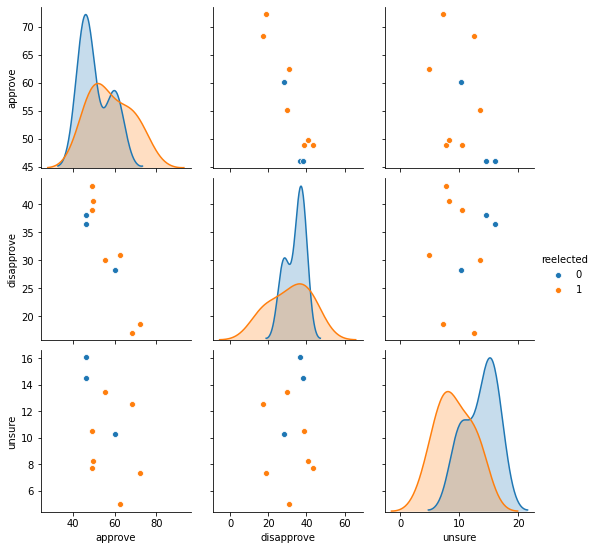

In [0]:
# understand distribution and relationship of approval ratings during reelection years
ax1 = sns.pairplot(president_df, vars=["approve", "disapprove", "unsure"], hue = "reelected")

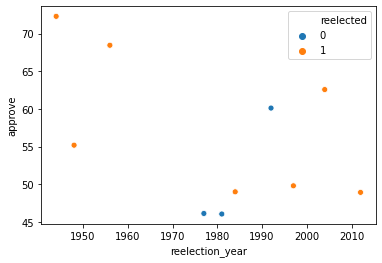

In [0]:
# scatter plot of presidents approval rating in the years
# leading up to the reelection
ax2 = sns.scatterplot(x="reelection_year", y="approve", data=president_df, hue="reelected")

In [0]:
# check correlation matrix for reelection versus approva, disapprovla, 
# and unsure ratings
president_df.corr()

,approve,disapprove,unsure,reelection_year,reelected
approve,1.000000,-0.922773,-0.419179,-0.494320,0.368917
disapprove,-0.922773,1.000000,0.039021,0.717355,-0.153112
unsure,-0.419179,0.039021,1.000000,-0.405008,-0.592906
reelection_year,-0.494320,0.717355,-0.405008,1.000000,-0.112765
reelected,0.368917,-0.153112,-0.592906,-0.112765,1.000000
